In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
import matplotlib
from matplotlib.colors import LogNorm


matplotlib.style.use('ggplot')
# Load data from the CSV file (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('logs.csv')

data.head()

x = data['worker']
y = data[' file']
z_time = data[' time ']

# data[' file'].nunique()

len(x)

# Save the plot as an image (e.g., 'contour_plo


1248

In [44]:
sdf = pd.read_csv('serial_logs.csv')
fls = sdf['file']
tls = sdf['time']

serial_time = {f: t for f, t in zip(fls, tls)}

avg_time = []

for f,t in zip(fls,tls):
    avg_time.append(t/f)

avg_time = np.mean(avg_time)

print(avg_time)
    # print(f,t)


0.3222219559927321


In [32]:

unique_x = np.unique(x)
len(unique_x)

32

[0.024425577922532807, 0.039896504699169014, 0.2075382773943556, 0.026515273031079926, 0.04178587569558658, 0.1925767723699083, 0.09163122568275317, 0.1102968311718401, 0.10024564668660191, 0.024681357617367936, 0.04823532885345044, 0.060830548828756166, 0.039573865857124, 0.01790632106362942, 0.07081663348464477, 0.041678810980332194, 0.13960113802072627, 0.20237486058837062, 0.05832995523534823, 0.11541346941236964, 0.022302781515547227, 0.24146822303552723, 0.02140059693421313, 0.0395137239992704, 0.02675065396434385, 0.06198296110045795, 0.0394997888925093, 0.19635216430620409, 0.021015725462049006, 0.0706009070183468, 0.031214419029839652, 0.019968123165303175, 0.23100422164326861, 0.022414593315867554, 0.05272153574140932, 0.18269479774848973, 0.058015169908846566, 0.18321044199573655, 0.18661281673762045, 0.044156623112545076, 0.12013344787478454, 0.037686408634570984, 0.11982996220109057, 0.05897843480610494, 0.03636316145053809, 0.02306303396459095, 0.13197905668722393, 0.0283

/tmp/ipykernel_10926/3339569637.py:38: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(CS)


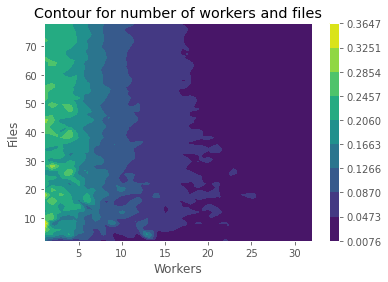

In [58]:
# Define grid for contour plot
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

z_new = []

# p, n , t
for x_val, y_val, z_val in zip(x,y, z_time):
    t_o = x_val*z_val - serial_time[y_val]
    K = y_val/t_o
    # print(K)
    # sys.exit()
    z_new.append(K)
    
#     z_new.append( serial_time[y_val]/ z_val)   
    # if z_val / serial_time[y_val] < 50:
        # print(x_val, y_val, z_val, serial_time[y_val], z_val / serial_time[y_val])

z = z_new
print(z)

# print(max(z))
z_grid = griddata((x, y), z, (x_grid, y_grid))

# levels = [20, 30, 40, 60, 100, 150, 200, 300]

lev = [5*i for i in range(0, 21)]

quartiles = np.percentile(z, lev)

# Determine contour levels at every 10%
contour_levels = np.arange(quartiles[0], quartiles[-1], (quartiles[-1] - quartiles[0]) * 0.1)



# Create contour plot with heatmap-like coloring
CS = plt.contourf(x_grid, y_grid, z_grid, levels = contour_levels)
# plt.clabel(CS, inline=2, fontsize=10)
plt.colorbar(CS)

# plt.colorbar()  # Add colorbar for heatmap
plt.xlabel('Workers')
plt.ylabel('Files')
plt.title('Contour for number of workers and files')

# Show the plot
plt.show()


In [53]:
z_new = []

# p, n , t
for x_val, y_val, z_val in zip(x,y, z_time):
    E = serial_time[y_val]/(x_val*z_val)
    
    z_new.append(E)
    
z = z_time
print(len(z))
print(type(z))
print(type(z_new))

z = z_new
z = np.array(z)

1248
<class 'pandas.core.series.Series'>
<class 'list'>


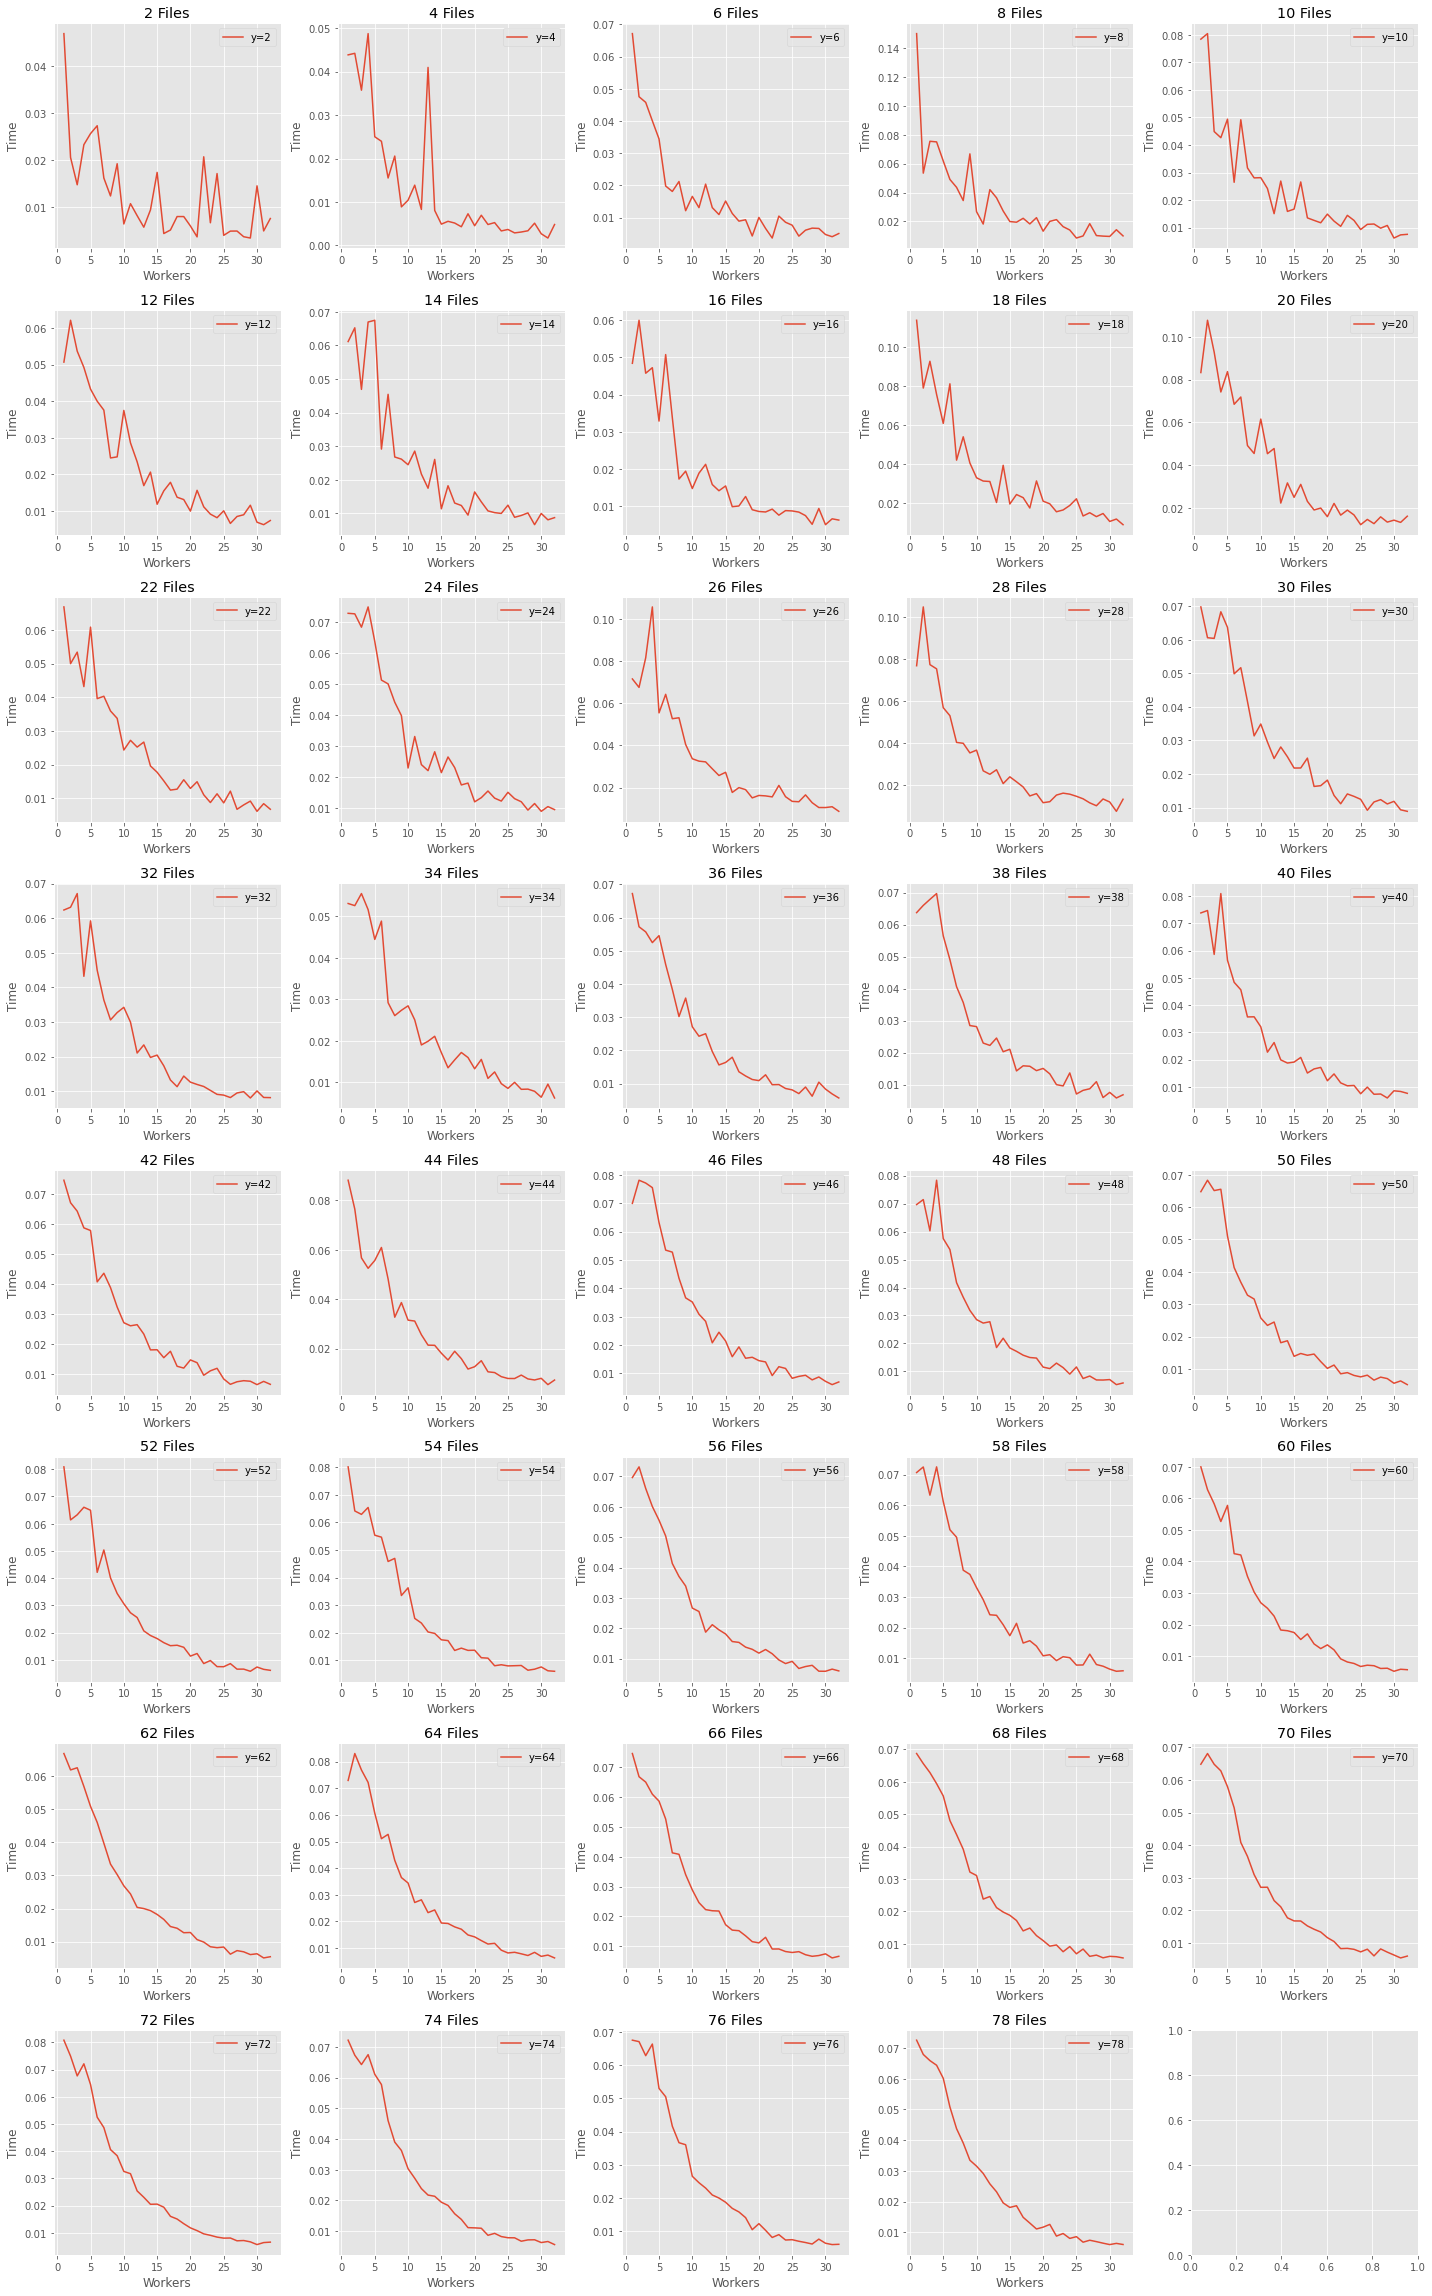

In [54]:

unique_y = np.unique(y)
x_values = x
y_values = y
z_values = z

fig, axes = plt.subplots(8, 5, figsize=(20, 32))

# Iterate through unique y values and create subplots
for i, y_val in enumerate(unique_y):
    # Filter data for the current y value
    x_sub = x_values[y_values == y_val]
    z_sub = z_values[y_values == y_val]
    
    x_sub = np.array(x_sub)
    z_sub = np.array(z_sub)
    
    sort_indices = np.argsort(x_sub)
    x_sub = x_sub[sort_indices]
    z_sub = z_sub[sort_indices]

    # Calculate subplot position in the grid
    row = i // 5
    col = i % 5

    # Create a subplot
    ax = axes[row, col]

    # Plot x vs. z for the current y value
    ax.plot(x_sub, z_sub, label=f'y={y_val}')

    # Customize subplot appearance
    ax.set_title(f'{y_val} Files')
    ax.set_xlabel('Workers')
    ax.set_ylabel('Time')
    ax.legend()

# Adjust layout and save the figure
plt.tight_layout()
# plt.savefig('subplots_grid.png', dpi=300)
plt.show()


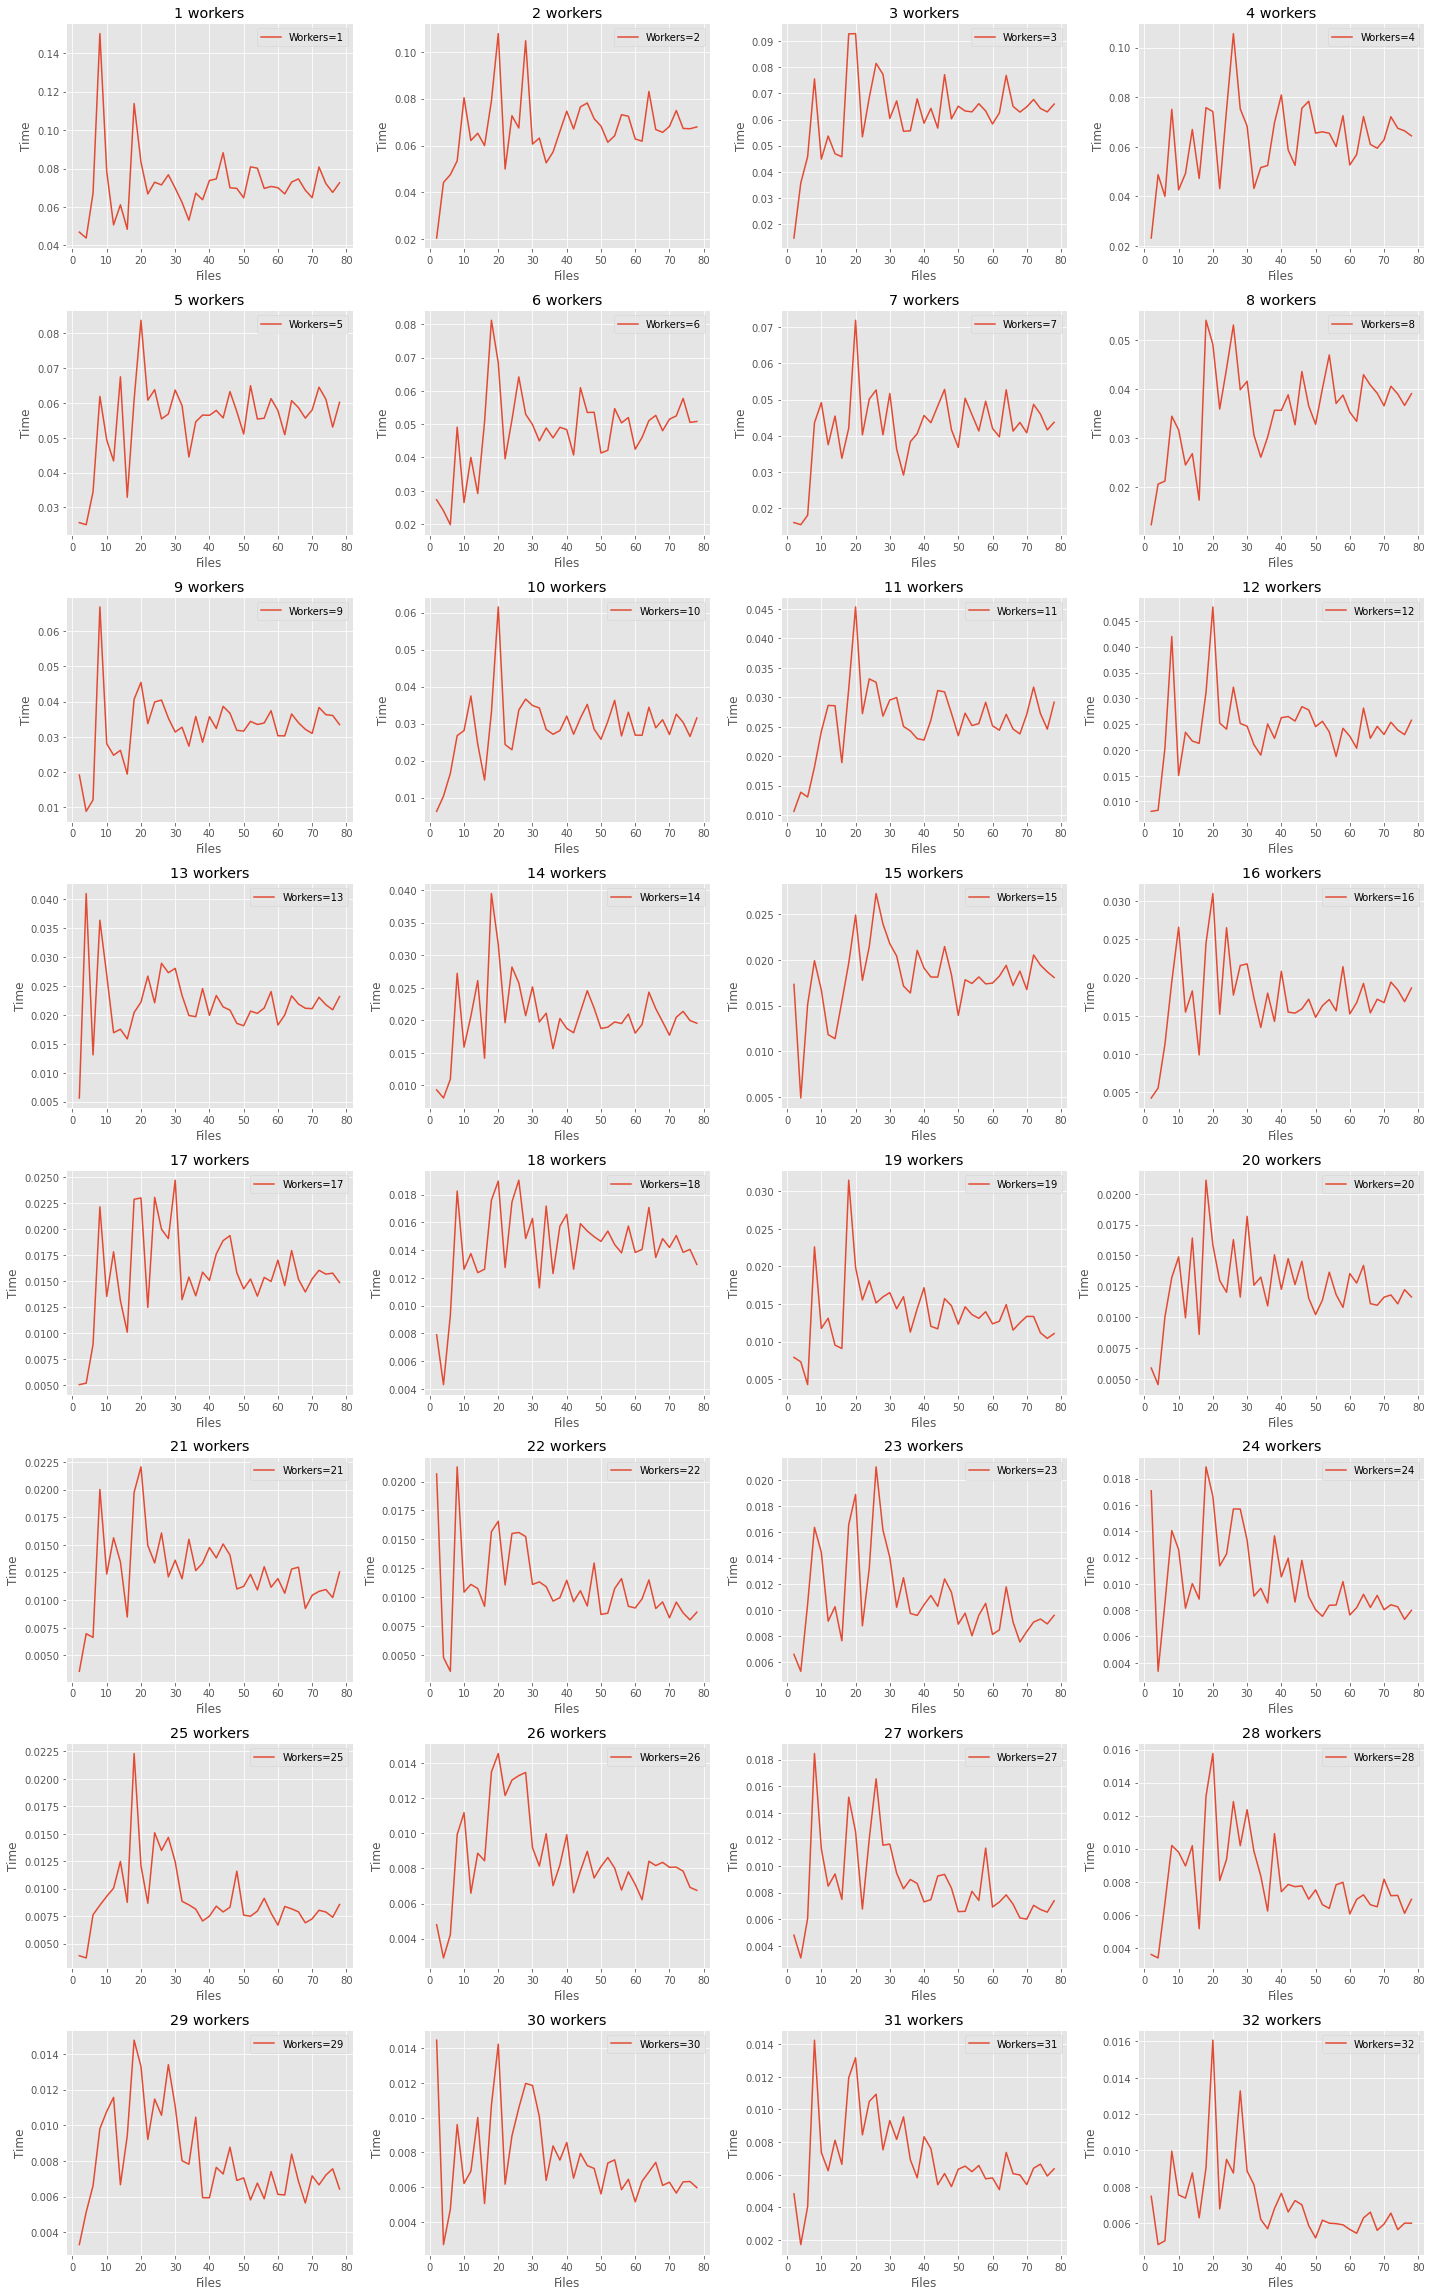

In [55]:

unique_x = np.unique(x)
x_values = x
y_values = y
z_values = z

fig, axes = plt.subplots(8, 4, figsize=(20, 32))

# Iterate through unique y values and create subplots
for i, x_val in enumerate(unique_x):
    # Filter data for the current y value
    y_sub = y_values[x_values == x_val]
    z_sub = z_values[x_values == x_val]
    
    y_sub = np.array(y_sub)
    z_sub = np.array(z_sub)
    
    sort_indices = np.argsort(y_sub)
    y_sub = y_sub[sort_indices]
    z_sub = z_sub[sort_indices]

    # Calculate subplot position in the grid
    row = i // 4
    col = i % 4

    # Create a subplot
    ax = axes[row, col]

    # Plot x vs. z for the current y value
    ax.plot(y_sub, z_sub, label=f'Workers={x_val}')

    # Customize subplot appearance
    ax.set_title(f'{x_val} workers')
    ax.set_xlabel('Files')
    ax.set_ylabel('Time')
    ax.legend()

# Adjust layout and save the figure
plt.tight_layout()
# plt.savefig('subplots_grid.png', dpi=300)
plt.show()
